In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
exams = pd.read_parquet('exams.parquet')
weekly_exams = pd.read_parquet('weekly_exams.parquet')

## Data Structure

In [3]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 533417 entries, 2020-07-01 07:28:47.017000 to 2022-06-30 23:44:45.623000
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   OrdDate         533413 non-null  datetime64[ns]
 1   SchDate         533417 non-null  datetime64[ns]
 2   EndDate         494088 non-null  datetime64[ns]
 3   acc             533417 non-null  string        
 4   Pt_Status       533417 non-null  category      
 5   ProtocolSystem  533417 non-null  category      
 6   DOB             533417 non-null  datetime64[ns]
 7   Age             533417 non-null  int64         
 8   sex             533417 non-null  category      
 9   ProtocolID      533417 non-null  int64         
 10  ProtocolCode    533391 non-null  category      
 11  Modality        533394 non-null  category      
 12  Division        533394 non-null  category      
 13  OrdExam         533394 non-null  category

In [23]:
all_ct_mask = (exams.Modality == 'CT')
all_mr_mask = (exams.Modality == 'MR')
gi_ct_iop_mask = (exams.Modality == 'CT') & (exams.Division == 'AB') & (exams.Pt_Status.isin(['O', 'I']))
gi_mr_iop_mask = (exams.Modality == 'MR') & (exams.Division == 'AB') & (exams.Pt_Status.isin(['O', 'I']))
th_ct_iop_mask = (exams.Modality == 'CT') & (exams.Division == 'TH') & (exams.Pt_Status.isin(['O', 'I']))
ne_mr_iop_mask = (exams.Modality == 'MR') & (exams.Division == 'NE') & (exams.Pt_Status.isin(['O', 'I']))
ne_ct_iop_mask = (exams.Modality == 'CT') & (exams.Division == 'NE') & (exams.Pt_Status.isin(['O', 'I']))
ms_mr_iop_mask = (exams.Modality == 'MR') & (exams.Division == 'MS') & (exams.Pt_Status.isin(['O', 'I']))
ms_ct_iop_mask = (exams.Modality == 'CT') & (exams.Division == 'MS') & (exams.Pt_Status.isin(['O', 'I']))
em_ct_mask = (exams.Modality == 'CT') & (exams.Pt_Status == 'E')
em_mr_mask = (exams.Modality == 'MR') & (exams.Pt_Status == 'E')
ap_mask = exams.ProtocolSystem == 'APE'
print(f"""{sum(all_ct_mask) = }, {sum(all_mr_mask) = }, 
{sum(gi_ct_iop_mask) = }, {sum(gi_mr_iop_mask) = }, 
{sum(th_ct_iop_mask) = }, 
{sum(ne_ct_iop_mask) = }, {sum(ne_mr_iop_mask) = }, 
{sum(ms_ct_iop_mask) = }, {sum(ms_mr_iop_mask) = }, 
{sum(em_ct_mask) = }, {sum(em_mr_mask) = }, 
{sum(ap_mask) = }, {sum(all_ct_mask & ap_mask) = }, {sum(all_mr_mask & ap_mask) = }""")

sum(all_ct_mask) = 343426, sum(all_mr_mask) = 169819, 
sum(gi_ct_iop_mask) = 69280, sum(gi_mr_iop_mask) = 27310, 
sum(th_ct_iop_mask) = 91160, 
sum(ne_ct_iop_mask) = 39689, sum(ne_mr_iop_mask) = 59620, 
sum(ms_ct_iop_mask) = 10466, sum(ms_mr_iop_mask) = 27904, 
sum(em_ct_mask) = 93593, sum(em_mr_mask) = 15836, 
sum(ap_mask) = 179588, sum(all_ct_iop_mask & ap_mask) = 106518, sum(all_mr_iop_mask & ap_mask) = 23803


In [4]:
exams.Modality.value_counts()

CT     343426
MR     169819
PT      11975
NM       8097
NC         50
ED         15
XR          7
US          3
FLP         1
MG          1
Name: Modality, dtype: int64

In [5]:
weekly_exams.columns

Index(['All CTs', 'All CTs AP', 'All MRs', 'All MRs AP', 'GI IO CTs',
       'GI IO CTs AP', 'GI IO MRs', 'GI IO MRs AP', 'TH IO CTs',
       'TH IO CTs AP', 'NE IO MRs', 'NE IO MRs AP', 'NE IO CTs',
       'NE IO CTs AP', 'MS IO CTs', 'MS IO CTs AP', 'MS IO MRs',
       'MS IO MRs AP', 'EM CTs', 'EM CTs AP'],
      dtype='object')

## Plotting Time Series

In [6]:
series_roots = ['All CTs', 'GI IO CTs', 'TH IO CTs', 'EM CTs']

In [7]:
ap_rates = pd.DataFrame({ f"{series} AP rate": weekly_exams[f"{series} AP"]/ weekly_exams[series] 
                          for series in series_roots })

In [8]:
smooth_ap_rates = ap_rates.rolling(window=3).mean()

In [9]:
weekly_exams['Other CTs'] = weekly_exams['All CTs']-weekly_exams['GI IO CTs']-weekly_exams['TH IO CTs']-weekly_exams['EM CTs']
#
weekly_ct_exams = weekly_exams[['GI IO CTs', 'TH IO CTs', 'EM CTs', 'Other CTs']]
weekly_ct_exams

GI IO CTs  TH IO CTs  EM CTs  Other CTs
ProtDate                                           
2020-07-05        260        665     578        419
2020-07-12        820        694     892        786
2020-07-19        712        890     823        707
2020-07-26        573        943     810        764
2020-08-02        704        820     834        853
...               ...        ...     ...        ...
2022-06-05        446        489     881        820
2022-06-12        461        507     943        763
2022-06-19        378        481     948        783
2022-06-26        359        397     924        691
2022-07-03        195        155     509        368

[105 rows x 4 columns]

<AxesSubplot:xlabel='ProtDate'>

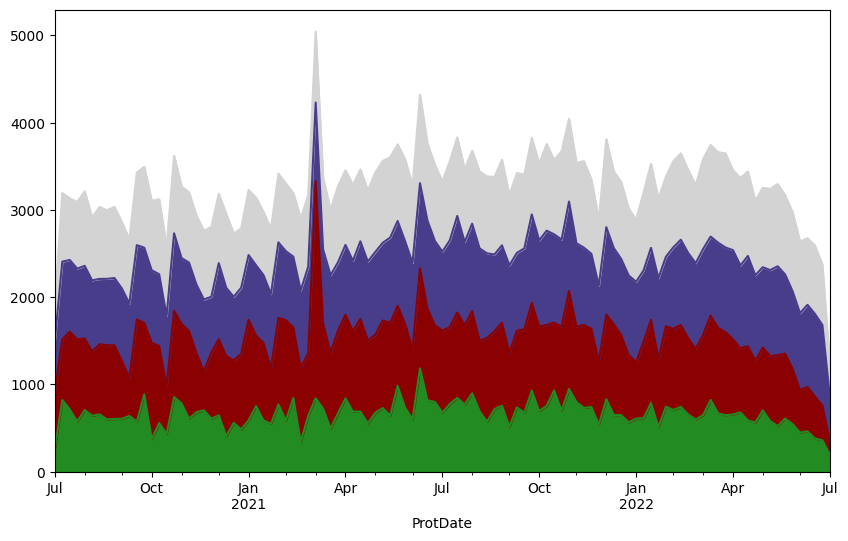

In [10]:
weekly_ct_exams.plot.area(stacked=True, figsize=(10,6), legend=False, 
                          style=['forestgreen', 'darkred', 'darkslateblue', 'lightgray'])

In [56]:
plt.style.use('seaborn')
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True, dpi=600, figsize=(16,12))
fig.tight_layout()
smooth_ap_rates.plot(kind='line', ax=ax[0], y='All CTs AP rate', label="All CTs", lw=5, color='darkblue')
smooth_ap_rates.plot(kind='line', ax=ax[0], y='GI IO CTs AP rate', label="GI Inpatient/Outpatient CTs", color='forestgreen')
smooth_ap_rates.plot(kind='line', ax=ax[0], y='TH IO CTs AP rate', label="Thoracic Inpatient/Outpatient CTs", color='darkred')
smooth_ap_rates.plot(kind='line', ax=ax[0], y='EM CTs AP rate', label="Emergency CTs", color='darkslateblue')
ax[0].axvline(x='2021-02-21', color='darkred', linestyle='dotted')
ax[0].annotate("Reconfigured\nthoracic CT", xy=('2021-02-23', 0.19))
ax[0].axvline(x='2021-05-25', color='forestgreen', linestyle='dotted')
ax[0].annotate("Reconfigured\nGI CT", xy=('2021-05-31', 0.04))
ax[0].axvline(x='2022-01-05', color='darkslateblue', linestyle='dotted')
ax[0].annotate("Reconfigured\nED CT", xy=('2022-01-10', 0.13))
ax[0].annotate("ED Order\nPage Changes", xy=('2021-07-01', 0.63))
ax[0].axvline(x='2022-05-01', color='#666666', linestyle='dotted')
ax[0].annotate("Contrast\nShortage", xy=('2022-05-05', 0.8))
ax[0].set_ybound(0, 1)
ax[0].set_ylabel("Proportion Automatically Protocoled\n(3-week moving average)")
ax[0].set_title("Proportion Automatically Protocoled")
ax[1].set_title("Protocoled Exam Volume")
# ax.legend().set_visible(False)
# ax2 = fig.add_axes([0.1, 0.65, 0.23, 0.23])
# ax2.pie(totals.values(), labels=totals.keys(), autopct='%1.1f%%', startangle=90, textprops={'fontsize':8, 'backgroundcolor': '#DDDDDD'}, colors=['forestgreen', 'darkred', 'darkslateblue', 'gray'])
# ax2.set_title(f"N={weekly_exams['All CTs'].sum()}", fontsize=10, x=0.5, y=-0.05, fontweight='bold')
weekly_ct_exams[1:-2].plot.area(ax=ax[1],stacked=True, 
                          style=['forestgreen', 'darkred', 'darkslateblue', 'gray'])
plt.xlabel("Week Exam Protocoled")
plt.savefig("autoprotocoling.pdf", transparent=False)
plt.show()

In [5]:
plot_params = {'All CTs AP rate': {'color': 'black', 'marker': '*', 'linestyle': 'None'},
               'GI IO CTs AP rate': {'color': 'black', 'linestyle': 'None', 'marker': 'o', 'markersize': 4},
               'TH IO CTs AP rate': {'color': 'black', 'linestyle': 'None', 'marker': 'v', 'markersize': 4},
               'EM CTs AP rate': {'color': 'black', 'linestyle': 'None', 'marker': 's', 'markersize': 4}}
smooth_plot_params = {'All CTs AP rate': {'color': 'black', 'linewidth': 3},
               'GI IO CTs AP rate': {'color': 'black', 'linewidth': 1.5, 'linestyle': 'dashed'},
               'TH IO CTs AP rate': {'color': 'black', 'linewidth': 1.5, 'linestyle': 'dashdot'},
               'EM CTs AP rate': {'color': 'black', 'linewidth': 1.5, 'linestyle': 'dotted'}}

In [73]:
plt.style.use('seaborn')
fig, ax = plt.subplots(dpi=600, figsize=(16,9))
# for series, params in plot_params.items():
#    _ = ax.plot(ap_rates.index, ap_rates[series], label=series, **params)
#  _ = ax.plot(ap_rates.index, smooth_ap_rates[series], label=series + " smoothed", **smooth_plot_params[series])
#    _ = ax.plot(ap_rates.index, ap_rates['All CTs AP rate'], label='All CTs', color='#1f77b4')
_ = ap_rates.plot(ax=ax, kind='line', legend=True)
_ = ax.set_title('Autoprotocoling Rates')
_ = ax.set_xlabel('Week')
_ = ax.set_ylabel('Autoprotocoling Rate')
_ = ax.legend(loc='upper left')
_ = ax.set_xlim(ap_rates.index.min(), ap_rates.index.max())

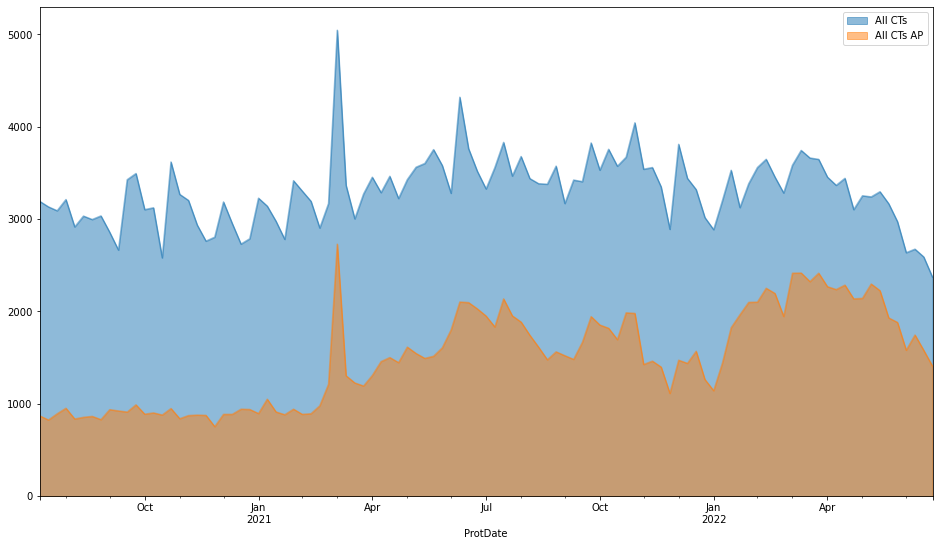

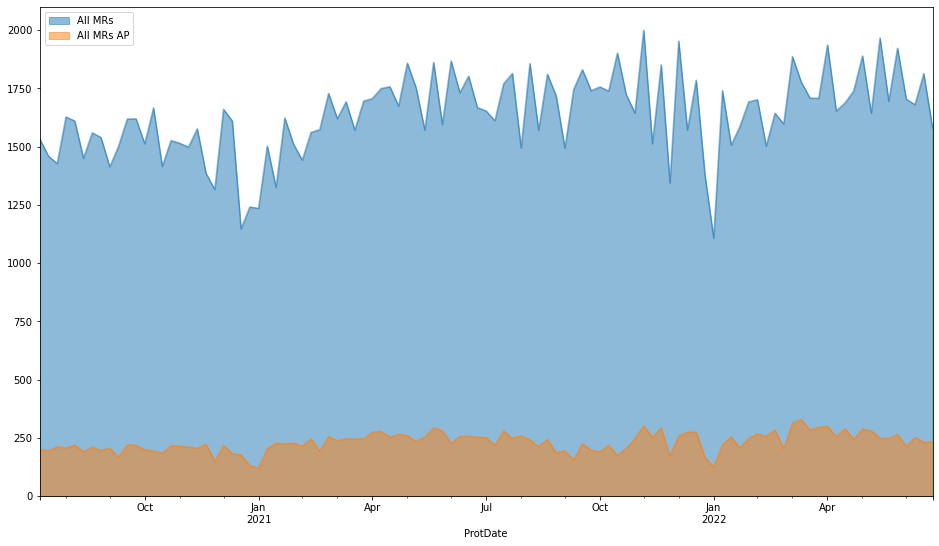

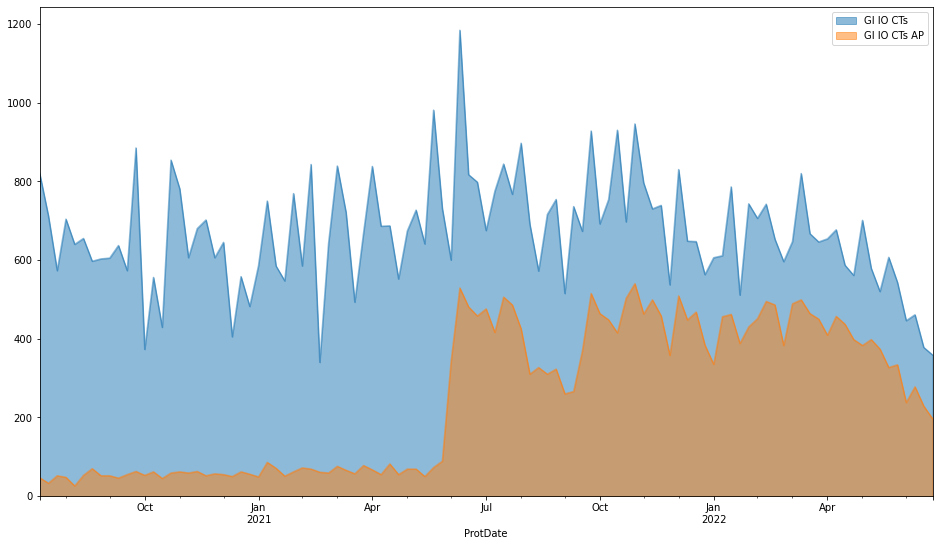

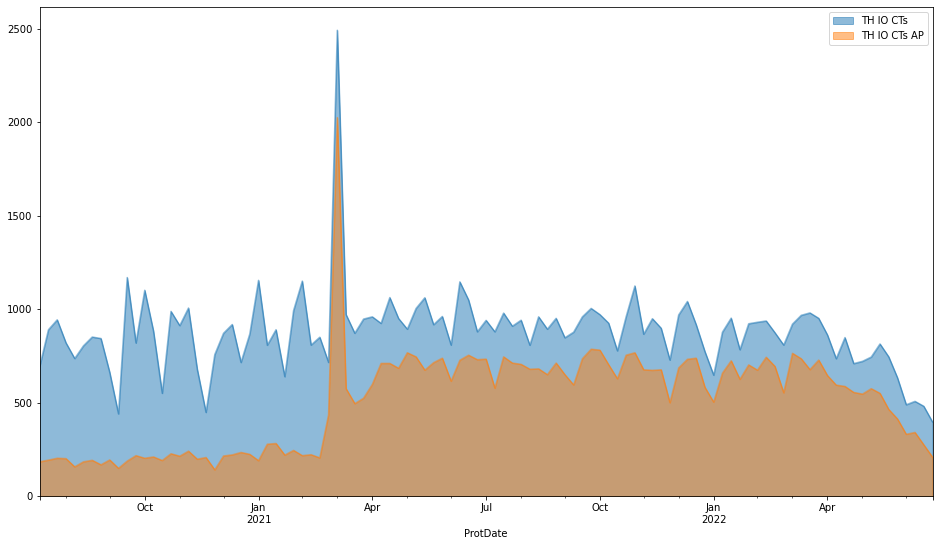

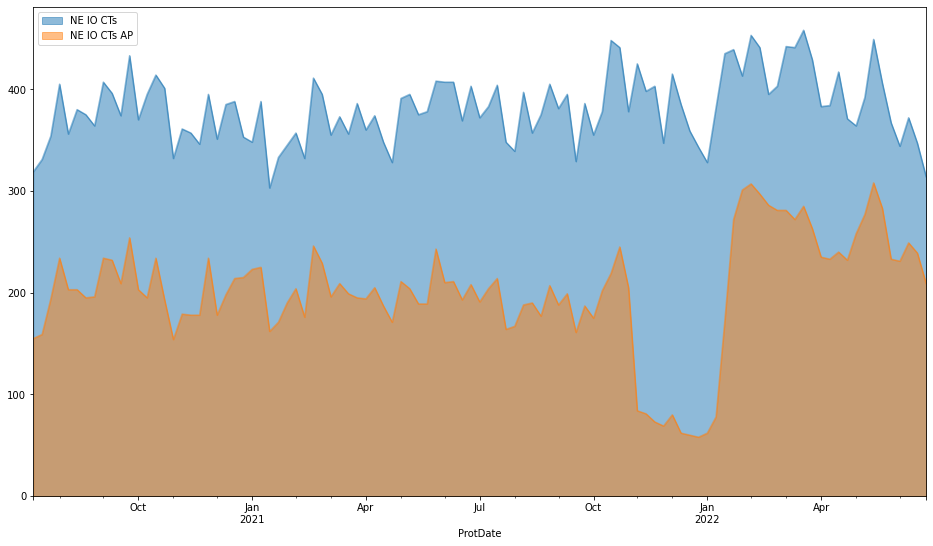

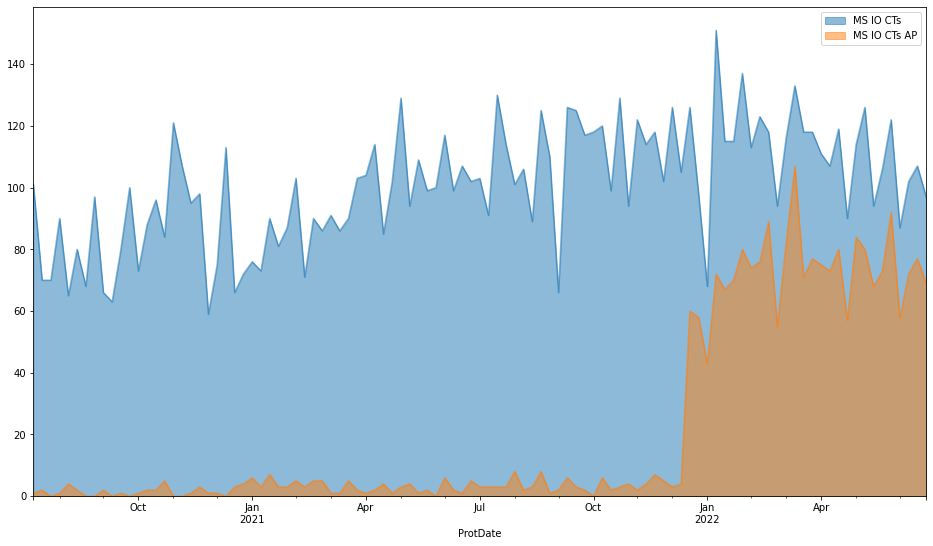

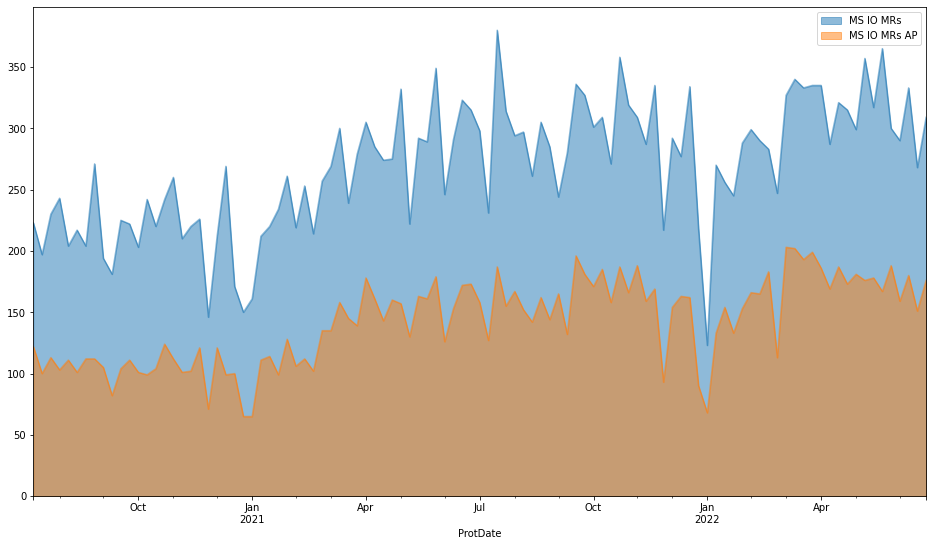

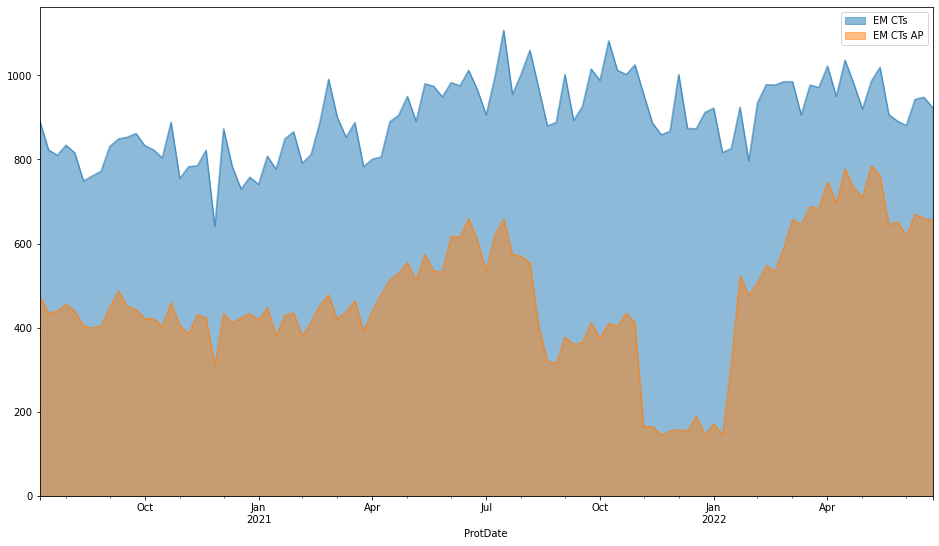

In [8]:
for series in ['All CTs', 'All MRs', 'GI IO CTs', 'TH IO CTs', 'NE IO CTs', 'MS IO CTs', 'MS IO MRs', 'EM CTs']:
    weekly_exams.loc['2020-07-12':'2022-06-26',[series, f"{series} AP"]].plot.area(stacked=False,figsize=(16,9))

## Interval Analysis

In [13]:
(exams['EndDate'] -exams['OrdDate']) > pd.Timedelta(5, 'D')

ProtDate
2020-07-01 07:28:47.017     True
2020-07-01 07:46:21.420     True
2020-07-01 08:09:08.967     True
2020-07-01 08:16:51.967     True
2020-07-01 08:17:01.133     True
2020-07-01 08:18:34.380     True
2020-07-01 08:19:24.350     True
2020-07-01 08:40:45.123     True
2020-07-01 09:10:16.577     True
2020-07-01 09:22:00.977     True
2020-07-01 10:28:00.077     True
2020-07-01 16:20:33.160     True
2020-07-01 16:21:46.760     True
2020-07-01 16:28:44.670     True
2020-07-01 16:35:08.037     True
2020-07-01 16:35:47.133     True
2020-07-01 16:44:45.063     True
2020-07-01 16:49:54.400     True
2020-07-01 16:51:43.470     True
2020-07-01 17:04:39.590     True
2020-07-01 17:04:52.533     True
2020-07-01 20:12:48.233     True
2020-07-01 20:15:02.073     True
2020-07-01 20:21:15.870     True
2020-07-02 07:28:13.243     True
2020-07-02 07:36:48.323     True
2020-07-02 07:37:20.780     True
2020-07-02 08:59:40.433    False
2020-07-02 11:54:57.743     True
2020-07-02 12:03:57.627     True
2

## Info on How We Got Here

In [ ]:
series_to_show = [('All CTs', all_ct_mask), ('All MRs', all_mr_mask), 
                  ('GI IO CTs', gi_ct_iop_mask), ('GI IO MRs', gi_mr_iop_mask), 
                  ('TH IO CTs', th_ct_iop_mask), 
                  ('NE IO MRs', ne_mr_iop_mask), ('NE IO CTs', ne_ct_iop_mask), 
                  ('MS IO CTs', ms_ct_iop_mask), ('MS IO MRs', ms_mr_iop_mask), 
                  ('EM CTs', em_ct_mask), ('EM MRs', em_mr_mask)]
for label, mask in series_to_show:
    weekly_exams[label] = exams[mask].resample('W')['acc'].count()
    weekly_exams[f"{label} AP"] = exams[mask & ap_mask].resample('W')['acc'].count()
    # exams[ne_ct_op_mask].resample('W')['acc'].count()
weekly_exams

In [ ]:
weekly_exams.drop(columns=['EM MRs', 'EM MRs AP'],inplace=True)

In [ ]:
weekly_exams.to_parquet('weekly_exams.parquet')
exams.to_parquet('exams.parquet')

In [24]:
exams.columns

Index(['OrdDate', 'SchDate', 'EndDate', 'acc', 'Pt_Status', 'ProtocolSystem',
       'DOB', 'Age', 'sex', 'ProtocolID', 'ProtocolCode', 'Modality',
       'Division', 'OrdExam', 'PerfExam', 'Ex_stat', 'signs_symptoms'],
      dtype='object')

In [25]:
lspine_orders=exams[exams.OrdExam=='MR.XS.LSPINE'][['acc', 'ProtocolCode', 'OrdExam', 'PerfExam']]

In [29]:
lspine_orders[lspine_orders['PerfExam'] == 'MR.NE.LSPINE-']['ProtocolCode'].value_counts().head(20)

MR Spine Neuro without contrast                           7829
ED routine lumbar spine                                    350
Other                                                      242
MR Lumbar Spine MSK without Gado                           235
MR Pedi Back Pain                                          141
MR Spine Neuro Cord Compression Survey (rads to check)     105
MR Spine Neuro with contrast                               103
ED cord compression survey                                  94
MR Pedi Tethered Cord                                       82
MR Spine Neuro Trauma (Rad to check)                        31
MR Neuro Lumbar Spine C-                                    30
MR Neuro CSF Leak Survey                                    26
ED lumbar spine with gadolinium                             24
MR Spine Neuro Cord Compression Survey                      24
Postoperative spine with metallic hardware                  14
MR Spine Neuro Trauma                                  